# Visualización de datos con Seaborn

Este tutorial es una adaptación al español del tutorial [Plot With Pandas: Python Data Visualization for Beginners](https://realpython.com/pandas-plot-python/) desarrollado por Reka Hovath en el portal Real Python.


Ya sea que estés conociendo un conjunto de datos o te estés preparando para publicar tus hallazgos, la visualización es una herramienta esencial. 

La popular biblioteca de análisis de datos de Python Pandas ofrece varias opciones diferentes para visualizar sus datos con `.plot()`. 

Incluso si estás al comienzo de tu viaje de Pandas, pronto estarás creando gráficos básicos que producirán información valiosa sobre tus datos.

## Preparativos
Primero, descarga los datos pasando la URL de descarga a `pandas.read_csv()`:


In [2]:
import pandas as pd

download_url = "https://raw.githubusercontent.com/fivethirtyeight/data/master/college-majors/recent-grads.csv"
df = pd.read_csv(download_url)
type(df)

pandas.core.frame.DataFrame

Al llamar a `read_csv()`, creas un **DataFrame**, que es la estructura de datos principal utilizada en pandas.



Ahora que tienes un DataFrame, puedes echar un vistazo a los datos. Primero, debes configurar la opción display.max.columns para asegurarte de que pandas no oculte ninguna columna. Luego puede ver las primeras filas de datos con .head():

In [3]:
pd.set_option("display.max.columns", None)
df.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,558,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,1069,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


El número predeterminado de filas que muestra `.head()` es cinco, pero puedes especificar cualquier número de filas como argumento. Por ejemplo, para mostrar las primeras diez filas, puedes usar `df.head(10)`.

## Crea tu primera visualización con Pandas
El conjunto de datos contiene algunas columnas relacionadas con los ingresos de los graduados en cada especialización:

- La "mediana" es la mediana de los ingresos de los trabajadores a tiempo completo durante todo el año.
- "P25th" es el percentil 25 de ganancias.
- "P75th" es el percentil 75 de ganancias.
- "Rank" es el ranking de la especialidad según la mediana de ingresos.

Comencemos con un gráfico que muestre estas columnas. Puedes hacerlo con `.plot()`:

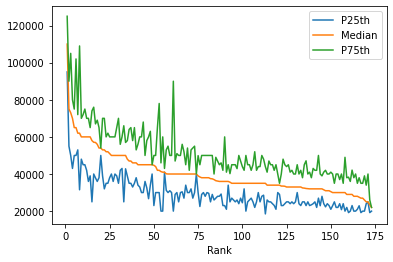

In [4]:
df.plot(x="Rank", y=["P25th", "Median", "P75th"]);

`.plot()` devuelve un gráfico de líneas que contiene los datos de cada fila en el DataFrame. Los valores del eje x representan el ranking de cada institución, y los valores "P25th", "Median" y "P75th" están graficados en el eje y. Al observar la gráfica puede hacer las siguientes observaciones:

- El ingreso medio disminuye a medida que disminuye el ranking. Esto se espera porque el ranking está determinado por el ingreso medio.
- Algunas carreras tienen grandes brechas entre los percentiles 25 y 75. Las personas con estos títulos pueden ganar significativamente menos o significativamente más que el ingreso medio.
- Otras carreras tienen brechas muy pequeñas entre los percentiles 25 y 75. Las personas con estos títulos ganan salarios muy cercanos al ingreso medio.

¡Tu primera visualización ya insinúa que hay mucho más por descubrir en los datos! Algunas carreras tienen una amplia gama de ingresos y otras tienen un rango bastante estrecho. Para descubrir estas diferencias, utilizarás varios otros tipos de gráficos.

`.plot()` tiene varios parámetros opcionales. En particular, el parámetro `kind` acepta once valores de cadena diferentes y determina qué tipo de gráfico creará:

- "area" es para parcelas de área.
- "bar" es para gráficos de barras verticales.
- "barh" es para gráficos de barras horizontales.
- "box" es para diagramas de caja.
- "hexbin" es para parcelas de hexbin.
- "hist" es para histogramas.
- "kde" es para gráficos de estimación de densidad de kernel.
- "density" es un alias de "kde".
- "line" es para gráficos de líneas.
- "pie" es para gráficos circulares.
- "scatter" es para diagramas de dispersión.

Intenta ahora agregar el argumento `kind` para el mismo gráfico, empleando los parámetros `box`, `hist` y `density`:

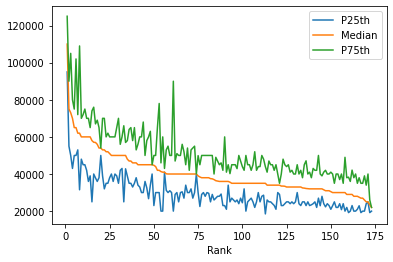

In [5]:
df.plot(x="Rank", y=["P25th", "Median", "P75th"], kind="line");

Si no proporcionas los parámetros `x` e `y` a `.plot()`, entonces crea una gráfica de línea con el índice en el eje X y todas las columnas numéricas en el eje Y. 

Si bien este es un valor predeterminado útil para conjuntos de datos con solo unas pocas columnas, para el conjunto de datos de las especialidades universitarias y sus varias columnas numéricas, parece un desastre.

Inténtalo bajo tu propio riesgo:

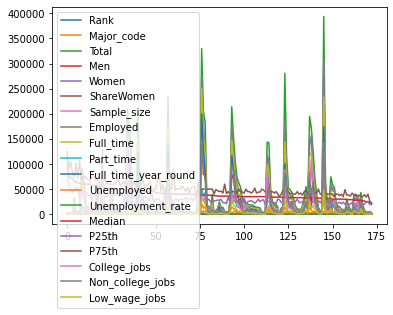

In [6]:
df.plot(kind="line");

## Mira bajo el capó: Matplotlib
Cuando llamas a `.plot()` en un objeto DataFrame, Matplotlib crea la trama bajo el capó.

Para verificar esto, prueba dos fragmentos de código. 

Primero, crea una gráfica con Matplotlib usando dos columnas de su DataFrame:

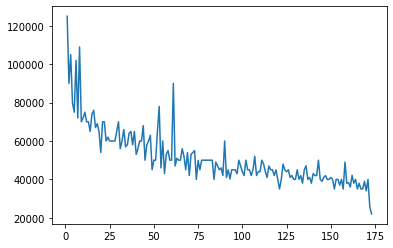

In [7]:
import matplotlib.pyplot as plt

plt.plot(df["Rank"], df["P75th"]);

Primero, importas el módulo `matplotlib.pyplot` y le cambias el nombre a `plt`. 

Luego, llamas a `plot()` y pasas la columna "Rank" del objeto DataFrame como primer argumento y la columna "P75th" como segundo argumento.

Puede crear exactamente el mismo gráfico utilizando el método `.plot()` del objeto DataFrame:

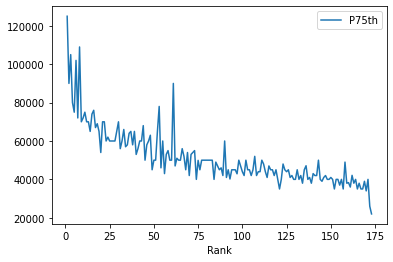

In [8]:
df.plot(x="Rank", y="P75th");

`.plot()` es un contenedor (**wrapper**) para `pyplot.plot()`, y el resultado es un gráfico idéntico al que se produjo con Matplotlib.

Puedes usar `pyplot.plot()` y `df.plot()` para producir el mismo gráfico a partir de columnas de un objeto DataFrame. 

Sin embargo, si ya tienes una instancia de DataFrame, `df.plot()` ofrece una sintaxis más limpia que `pyplot.plot()`.

## Un wrapper destacado por su elegancia: Seaborn

Pandas no es el único wrapper de Matplotlib. Matplotlib ofrece las bases para crear gráficos altamente personalizados. Por ello, existen muchos paquetes de visualización de datos en Python que se apoyan en esta librería. 

Dentro de ellas, una muy utilizada en la comunidad científica por su simplicidad y elegencia es `Seaborn`. Seaborn ofrece gráficos con configuraciones adaptadas al uso común que se da en la comunicación científica. 

Para usar Seaborn, basta importarlo como las demás librerías:

In [9]:
import seaborn as sns

## Explora tus datos con Seaborn

Para demostrar el uso de Seaborn, vamos a explorar la base de datos "National Health and Nutrition Examination Survey" (NHANES) del gobierno estadounidense:

In [10]:
#!pip install nhanes
from nhanes.load import load_NHANES_data

nhanes_data = load_NHANES_data()
nhanes_data.head()

,GeneralHealthCondition,EverBreastfedOrFedBreastmilk,AgeStoppedBreastfeedingdays,AgeFirstFedFormuladays,AgeStoppedReceivingFormuladays,AgeStartedOtherFoodbeverage,AgeFirstFedMilkdays,TypeOfMilkFirstFedWholeMilk,TypeOfMilkFirstFed2Milk,TypeOfMilkFirstFed1Milk,TypeOfMilkFirstFedFatFreeMilk,TypeOfMilkFirstFedSoyMilk,TypeOfMilkFirstFedOther,HowHealthyIsTheDiet,Past30DayMilkProductConsumption,YouDrinkWholeOrRegularMilk,YouDrink2FatMilk,YouDrink1FatMilk,YouDrinkFatFreeskimMilk,YouDrinkSoyMilk,YouDrinkAnotherTypeOfMilk,RegularMilkUse5TimesPerWeek,HowOftenDrankMilkAge512,HowOftenDrankMilkAge1317,HowOftenDrankMilkAge1835,CommunitygovernmentMealsDelivered,EatMealsAtCommunityseniorCenter,AttendKindergartenThruHighSchool,SchoolServesSchoolLunches,OfTimesweekGetSchoolLunch,SchoolLunchFreeReducedOrFullPrice,SchoolServeCompleteBreakfastEachDay,OfTimesweekGetSchoolBreakfast,SchoolBreakfastFreereducedfullPrice,SummerProgramMealFreereducedPrice,OfMealsNotHomePrepared,OfMealsFromFastFoodOrPizzaPlace,OfReadytoeatFoodsInPast30Days,OfFrozenMealspizzaInPast30Days,HeardOfMyPlate,LookedUpMyPlateOnInternet,TriedMyPlatePlan,MainMealPlannerpreparer,SharedMealPlanningpreparingDuty,MainFoodShopper,SharedFoodShoppingDuty,HaveSeriousDifficultyHearing,HaveSeriousDifficultySeeing,HaveSeriousDifficultyConcentrating,HaveSeriousDifficultyWalking,HaveDifficultyDressingOrBathing,HaveDifficultyDoingErrandsAlone,HowOftenDoYouFeelWorriedOrAnxious,TakeMedicationForTheseFeelings,HowOftenDoYouFeelDepressed,TakeMedicationForDepression,CoveredByHealthInsurance,UsualSleepTimeOnWeekdaysOrWorkdays,UsualWakeTimeOnWeekdaysOrWorkdays,SleepHoursWeekdaysOrWorkdays,HowOftenDoYouSnore,EverToldDoctorHadTroubleSleeping,HowOftenFeelOverlySleepyDuringDay,HaveLittleInterestInDoingThings,FeelingDownDepressedOrHopeless,TroubleSleepingOrSleepingTooMuch,FeelingTiredOrHavingLittleEnergy,PoorAppetiteOrOvereating,FeelingBadAboutYourself,TroubleConcentratingOnThings,MovingOrSpeakingSlowlyOrTooFast,ThoughtYouWouldBeBetterOffDead,DifficultyTheseProblemsHaveCaused,SmokedTobaccoLast5Days,DaysSmokedCigarettesLast5Days,CigarettesSmokedPerDay,UsedAnyTobaccoProductLast5Days,ExperienceConfusionmemoryProblems,PhysicalMentalEmotionalLimitations,DifficultyManagingMoney,60SecHr30SecHr2,60SecPulse30SecPulse2,SystolicBloodPres1StRdgMmHg,DiastolicBloodPres1StRdgMmHg,SystolicBloodPres2NdRdgMmHg,DiastolicBloodPres2NdRdgMmHg,SystolicBloodPres3RdRdgMmHg,DiastolicBloodPres3RdRdgMmHg,EnergyKcal_DR2TOT,ProteinGm_DR2TOT,CarbohydrateGm_DR2TOT,TotalSugarsGm_DR2TOT,DietaryFiberGm_DR2TOT,TotalFatGm_DR2TOT,TotalSaturatedFattyAcidsGm_DR2TOT,TotalMonounsaturatedFattyAcidsGm_DR2TOT,TotalPolyunsaturatedFattyAcidsGm_DR2TOT,CholesterolMg_DR2TOT,AlcoholGm_DR2TOT,WeightKg,RecumbentLengthCm,StandingHeightCm,BodyMassIndexKgm2,WaistCircumferenceCm,DirectHdlcholesterolMgdl,TotalCholesterolMgdl,VigorousWorkActivity,ModerateWorkActivity,WalkOrBicycle,VigorousRecreationalActivities,ModerateRecreationalActivities,MinutesSedentaryActivity,EverBeenToldYouHaveAsthma,DoctorEverSaidYouHadArthritis,EverToldYouHadHeartAttack,AgeWhenToldYouHadHeartAttack,EverToldYouHadAStroke,AgeWhenToldYouHadAStroke,EverToldYouHadCancerOrMalignancy,1StCancerWhatKindWasIt,Age1StCancerMcq230ADiagnosed,EverUsedMarijuanaOrHashish,DaysUsedMarijuanaOrHashishmonth,EverUsedCocaineheroinmethamphetamine,EverUseAnyFormOfCocaine,OfDaysUsedCocainemonth,EverUsedHeroin,OfDaysUsedHeroinmonth,EverUsedMethamphetamine,DaysUsedMethamphetaminemonth,EverBeenInRehabilitationProgram,BloodLeadUgdl,BloodCadmiumUgl,BloodMercuryTotalUgl,BloodSeleniumUgl,BloodManganeseUgl,Gender,AgeInYearsAtScreening,AgeInMonthsAtScreening0To24Mos,RacehispanicOrigin,RacehispanicOriginWNhAsian,ServedActiveDutyInUsArmedForces,EducationLevelChildrenyouth619,EducationLevelAdults20,MaritalStatus,TotalNumberOfPeopleInTheHousehold,TotalNumberOfPeopleInTheFamily,OfChildren5YearsOrYoungerInHh,OfChildren617YearsOldInHh,OfAdults60YearsOrOlderInHh,AnnualHouseholdIncome,AnnualFamilyIncome,RatioOfFamilyIncomeToPoverty,Tru

### Histogramas

Podemos crear un histograma con el método `histplot` disponible en Seaborn:

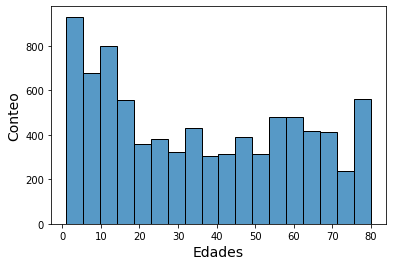

In [11]:
import matplotlib.pyplot as plt

histogram = sns.histplot(x="AgeInYearsAtScreening", data=nhanes_data)
histogram.set_xlabel("Edades", fontsize=14)
histogram.set_ylabel("Conteo", fontsize=14)
plt.show()

En general, la sintaxis de Seaborn pide especificar un parámetro para el argumento `data` y precisar los ejes en los argumentos `x` e `y`. 

Podemos personalizar el gráfico recurriendo a métodos de Matplotlib como `set_xlabel` y `set_ylabel` para configurar los títulos de los ejes. Al finalizar usamos la sentencia `plt.show()` para que muestre el gráfico en nuestra interfaz. 

Los histogramas pueden recibir un argumento extra llamado `bins` que permite delimitar el ancho de las barras. 

Veamos un ejemplo:

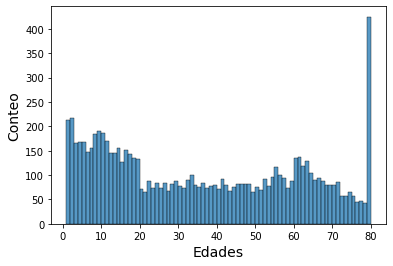

In [12]:
import numpy as np

custom_bins = np.arange(
    nhanes_data["AgeInYearsAtScreening"].min(),
    nhanes_data["AgeInYearsAtScreening"].max() + 1,
)

bin_histogram = sns.histplot(
    x="AgeInYearsAtScreening", data=nhanes_data, bins=custom_bins
)
bin_histogram.set_xlabel("Edades", fontsize=14)
bin_histogram.set_ylabel("Conteo", fontsize=14)
plt.show()

Aquí creamos bins personalizados empleando un método de numpy llamado `arange`, el cual es util para generar rangos de datos. 

Podemos pedir a Seaborn que dibuje una linea para representar los histogramas mediante el proceso Kernel Density Estimation, usando el argumento `kde`:

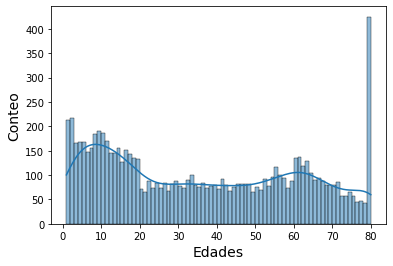

In [13]:
kde_bin_histogram = sns.histplot(
    x="AgeInYearsAtScreening", data=nhanes_data, bins=custom_bins, kde=True
)
kde_bin_histogram.set_xlabel("Edades", fontsize=14)
kde_bin_histogram.set_ylabel("Conteo", fontsize=14)
plt.show()

### Gráficos de dos variables

Otro uso común de la visualización es examinar la relación entre dos variables. Por ejemplo, digamos que queríamos graficar la altura promedio en función de la edad en el conjunto de datos de NHANES. 

Generemos este gráfico con Seaborn:

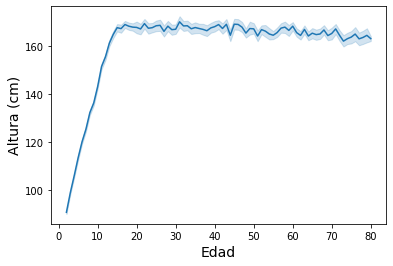

In [14]:
age_and_height = sns.lineplot(
    x="AgeInYearsAtScreening", y="StandingHeightCm", data=nhanes_data
)
age_and_height.set_xlabel("Edad", size=14)
age_and_height.set_ylabel("Altura (cm)", size=14)
plt.show()
# plt.legend(['Femenino', 'Masculino'],title='Género');

Seaborn por defecto nos arroja el promedio y el intervalo de confianza de los datos agrupados por edad. Vemos el intervalo de confianza sombreado alrededor de la línea.

Podemos pedirle a Seaborn que en el mismo gráfico nos genere una línea para hombres y otra para mujeres:

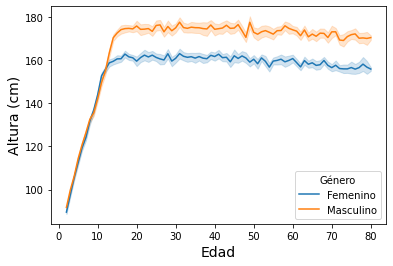

In [15]:
age_and_height = sns.lineplot(
    x="AgeInYearsAtScreening",
    y="StandingHeightCm",
    hue="Gender",
    data=nhanes_data,
)
age_and_height.set_xlabel("Edad", size=14)
age_and_height.set_ylabel("Altura (cm)", size=14)
age_and_height.legend(["Femenino", "Masculino"], title="Género")
plt.show()

Esto fue gracias al argumento `hue`, el cual nos permite agrupar los resultados en función a una tercera variable, en este caso `Gender`.

#### Gráficos de cajas

Un trabajo importante de la visualización estadística es mostrarnos la variabilidad o dispersión de nuestros datos. Ya hemos visto cómo hacer esto usando histogramas; ahora veamos cómo podemos comparar distribuciones.

Comencemos con un ejemplo simple: comparar la altura de hombres y mujeres adultos en la muestra de NHANES. Un diagrama de uso común es el diagrama de caja (a veces conocido como diagrama de caja y bigotes). 

Generemos un gráfico de cajas con Seaborn:

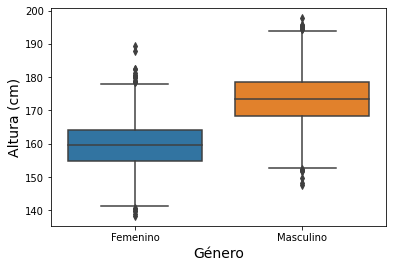

In [16]:
adult_nhanes_data = nhanes_data.query("AgeInYearsAtScreening > 17")
boxplot = sns.boxplot(x="Gender", y="StandingHeightCm", data=adult_nhanes_data)
boxplot.set_xlabel("Género", size=14)
boxplot.set_ylabel("Altura (cm)", size=14)
plt.xticks([0, 1], ["Femenino", "Masculino"])
plt.show()

Pudimos generar este gráfico llamando a la función `boxplot` y precisando los argumentos básicos: `data`, `x` e `y`. 

Para trabajar solo con los adultos, aplicamos un filtro a nuestra base de datos con el método `query` de pandas. 

Otro tipo de gráfico que se usa comúnmente es el gráfico de violín, que muestra la forma de toda la distribución:

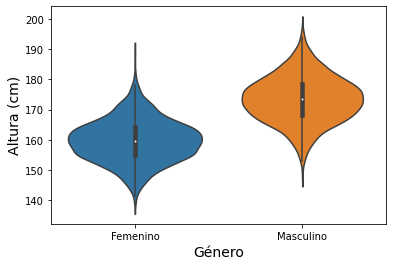

In [17]:
violinplot = sns.violinplot(
    x="Gender", y="StandingHeightCm", data=adult_nhanes_data
)
violinplot.set_xlabel("Género", size=14)
violinplot.set_ylabel("Altura (cm)", size=14)
plt.xticks([0, 1], ["Femenino", "Masculino"])
plt.show()

## Buscar correlaciones
A menudo, deseas ver si dos columnas de un conjunto de datos están conectadas. 

Por ejemplo, podemos explorar si el peso y la altura de los adultos está relacionada:

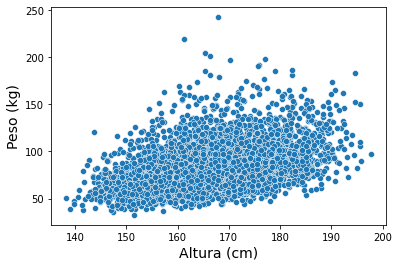

In [18]:
corr_plot = sns.scatterplot(
    x="StandingHeightCm", y="WeightKg", data=adult_nhanes_data
)

corr_plot.set_xlabel("Altura (cm)", size=14)
corr_plot.set_ylabel("Peso (kg)", size=14)
plt.show()

Con Seaborn, podemos pedir más de un gráfico de correlación a la vez:

(Para demostrar este punto usaremos una base de datos más pequeña para reducir el tiempo de cómputo).

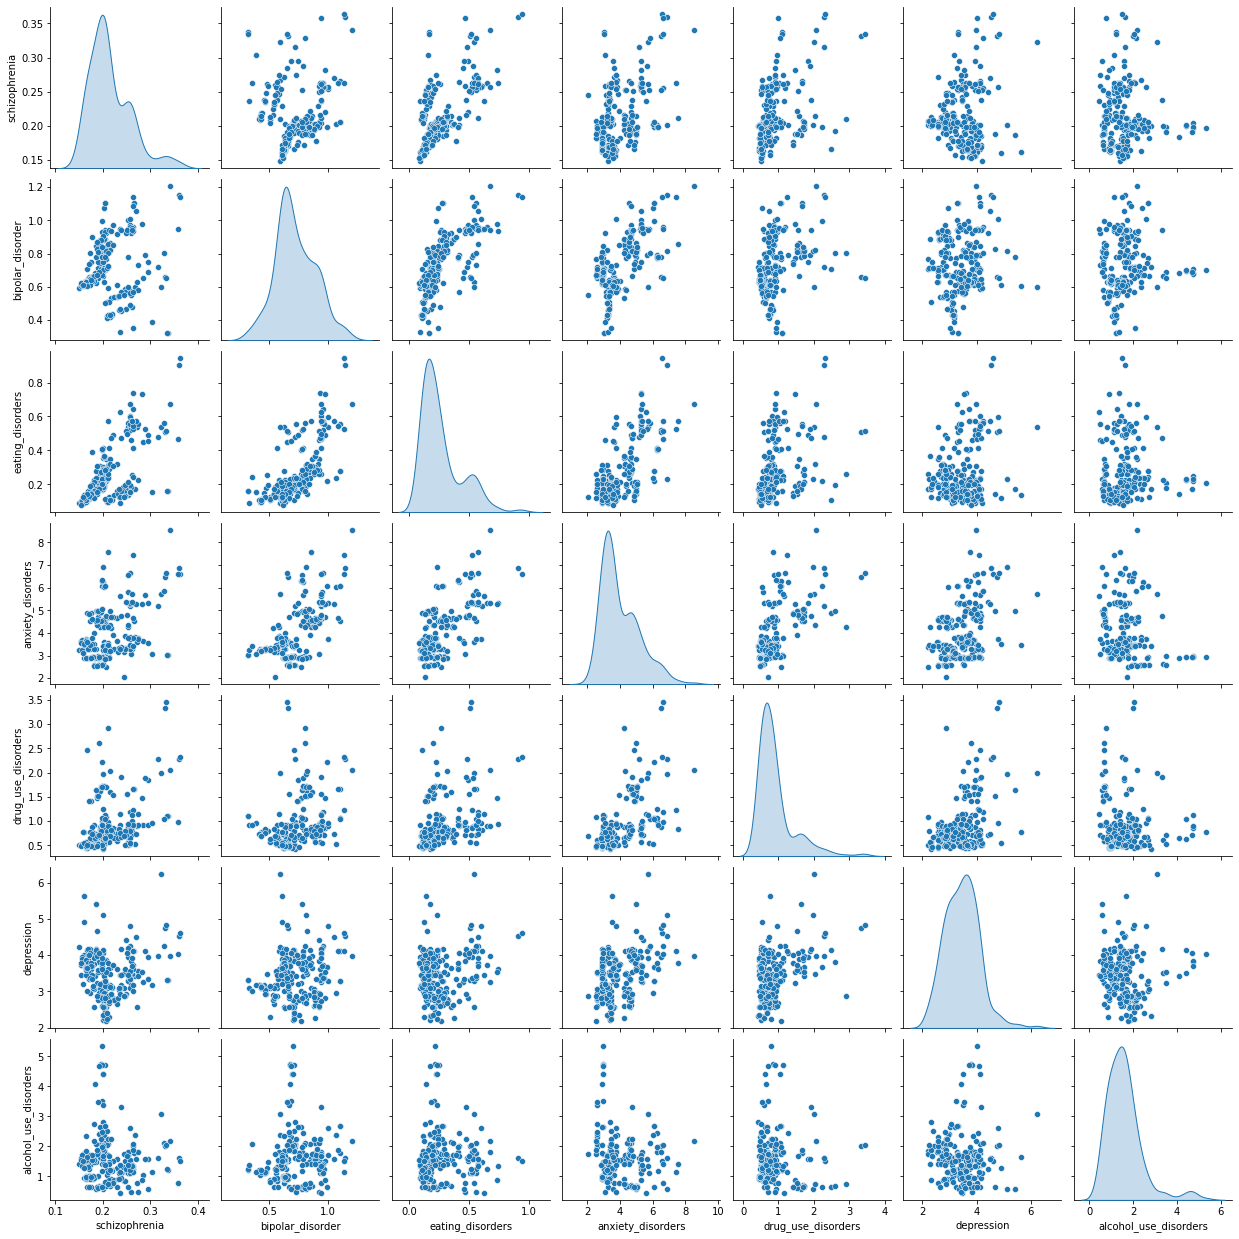

In [22]:
# Cargamos los datos
df_subsdis = pd.read_csv(
    "https://raw.githubusercontent.com/renatoparedes/IntroPythonInvestigacionPsicologia/master/AnalisisdeDatosCuantitativos/depression-data-subsdis.csv"
)
df_subsdis.drop(columns=["year"], inplace=True)

# Generamos el gráfico
sns.pairplot(df_subsdis, diag_kind="kde")
plt.show()

Si tienes tiempo, te invito a revisar la [documentación de Seborn](https://seaborn.pydata.org/tutorial.html).